#  <mark> **SJU ACM Software Engineering Interview Prep**

# **Understanding the Importance of Time and Space Complexity**

### Inspired by: https://www.youtube.com/watch?v=oBt53YbR9Kk

<br>

### Nowadays, a majority of software engineering interviews focus on two main concepts: **Data Structures & Algorithms**. But why? 

### Why are these two concepts so essential to understand in order to work in an engineering role? 

### The short answer is **speed & efficiency**. 

<br>

> ### At major tech companies - Google, Facebook, Microsoft, Amazon, etc., engineers spend most of their time designing and developing optimal algorithms while experimenting with different data structures to maximize the speed of their programs while also minimizing use of the company’s resources (servers, computation power, etc).

<br>

> ### This is the main reason why interviews for these companies are so focused on data structures and algorithms, as they want people who can think outside the box to design algorithms that can save the company valuable resources. Google, YouTube, Facebook, Amazon, and Instagram have the highest number of users in the world. To handle more users on these sites it requires more optimization to be done and that’s why big tech companies hire candidates who can optimize their software and build new and efficient solutions for their problems. 

<br> 

---

<br>

## **To understand why writing fast and efficient algorithms is so important, think about this:**


* ## What if it took 30 seconds to load your home and explore page on Instagram, would you still use the app?

* ## What if searching for a song on Spotify took 1 minute, would you continue using it?

* ## What if Google Maps took 2 minutes to calculate the best route, would you continue using it?

<br>

---

<br>

## In order to write fast and efficient algorithms, we have to be able to compare the performance of algorithms to determine which one would be faster. 


### This is where **time complexity** comes in. 

#  <mark> **The time complexity of an algorithm measures its performance in relation to the size of its input** </mark>

### In order to better understand time complexity, we will focus on a problem that everyone is likely familiar with - the **Fibonacci Sequence**. 


## The Fibonacci Sequence is a series of numbers where the next number is found by adding up the two numbers before it. 

<br>

## The Formula for the Fibonacci Sequence is as follows:
    
> ## $F(n) = F(n-1) + F(n - 2)$

<br>

## As such, the first 10 numbers of the Fibonacci Sequence are:

> ## 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55

### Lets now imagine that we're making a web app that calculates the nth Fibonacci Number such as this:
![image](https://user-images.githubusercontent.com/43652410/142350052-57a87712-dd69-4f7f-a2d0-8414dbf520ec.png)
### We have to create a function that calculates Fib(n) given n

<br>

### The functions below show three different algorithms to calculate the Fibonacci numbers, with each set to calculate the 40th Fibonacci number

In [29]:
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statistics

In [12]:
FIBONACCI_NUM = 40

### Brute Force Recursive Approach for the Fibonacci Sequence

In [13]:
def bruteforce_fibonacci(n):
    
    if n <= 2: return 1 
    
    return bruteforce_fibonacci(n - 1) + bruteforce_fibonacci(n - 2)


bf_start = time.time()

bf_fib = bruteforce_fibonacci(FIBONACCI_NUM)

bf_end = time.time()

print(f"F({FIBONACCI_NUM}) = {bf_fib} \nExecution Time: {round(bf_end - bf_start, 2)} seconds")

F(40) = 102334155 
Execution Time: 29.1 seconds


### Optimized Recursive Approach with Memoization

In [14]:
def memoized_fibonacci(n, memo):
    
    if n in memo: return memo[n]
    
    if n <= 2: return 1
    
    memo[n] = memoized_fibonacci(n - 1, memo) + memoized_fibonacci(n - 2, memo)
    
    return memo[n]


mem_start = time.time()

mem_fib = memoized_fibonacci(FIBONACCI_NUM, {})

mem_end = time.time()

print(f"F({FIBONACCI_NUM}) = {mem_fib} \nExecution Time: {mem_end - mem_start} seconds")

F(40) = 102334155 
Execution Time: 0.00011229515075683594 seconds


## Optimized Iterative Approach with Tabulation

In [26]:
def tabulation_fibonacci(n):
    
    table = [0] * (n + 1)
    
    table[1] = 1
    
    for index in range(2, n + 1):
        
        table[index] += table[index - 1] + table[index - 2]
        
    return table[n]


tab_start = time.time()

tab_fib = tabulation_fibonacci(FIBONACCI_NUM)

tab_end = time.time()

print(f"F({FIBONACCI_NUM}) = {tab_fib} \nExecution Time: {tab_end - tab_start} seconds")

F(40) = 102334155 
Execution Time: 5.1021575927734375e-05 seconds


In [16]:
print(f"The memoized_fibonacci function is {round((bf_end - bf_start) / (mem_end - mem_start), 2)}x faster than the bruteforce_Fibonacci function")
print(f"\nThe tabulation_fibonacci function is {round((bf_end - bf_start) / (tab_end - tab_start), 2)}x faster than the bruteforce_Fibonacci function")

The memoized_fibonacci function is 259161.68x faster than the bruteforce_Fibonacci function

The tabulation_fibonacci function is 359015.15x faster than the bruteforce_Fibonacci function


In [17]:
def compare_execution_times():

    bf_times = [] 
    memo_times = []
    tab_times = []

    for n in range(5, 40):

        bf_start = time.time()
        bruteforce_fibonacci(n)
        bf_end = time.time()
        bf_times.append(bf_end - bf_start)

        mem_start = time.time()
        memoized_fibonacci(n, {})
        mem_end = time.time()
        memo_times.append(mem_end - mem_start)

        tab_start = time.time()
        tabulation_fibonacci(n)
        tab_end = time.time()
        tab_times.append(tab_end - tab_start)

    figure, axis = plt.subplots(2, figsize=(10,10))
    axis[0].plot(bf_times, label = 'Brute Force')
    axis[0].plot(memo_times, label = 'Memoized')
    axis[0].plot(tab_times, label = 'Tabulation')
    axis[0].legend(loc="upper left")

    axis[1].plot(memo_times, label = 'Memoized')
    axis[1].plot(tab_times, label = 'Tabulation')
    plt.legend()
    plt.show()


### These graphs show the relationship between the nth Fibonacci number (x-axis) and how long each function takes to compute the number (y-axis)

<br>

### We can see here that the Brute Force approach is extremely inefficient and slow compared to the memoized and tabulation approach, as for larger fibonacci numbers, the execution time increases **exponentially**

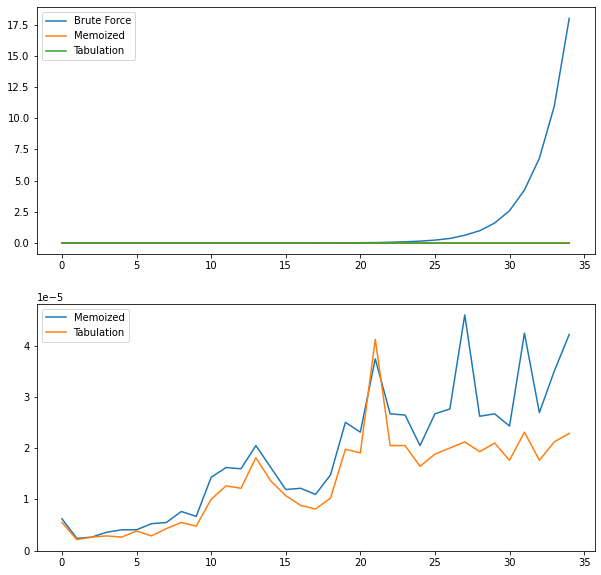

In [48]:
compare_execution_times()

## Why is the Brute Force approach so slow?

<br>

Lets take a closer look at the Brute Force function:

```python
def bruteforce_fibonacci(n):
    
    if n <= 2: return 1 

    return bruteforce_fibonacci(n - 1) + bruteforce_fibonacci(n - 2)
```

<br>

With this code, we can draw a tree to show how the 8th Fibonacci number is calculated:

<img src="https://github.com/SJUACM/Technical-Interview-Prep/blob/gh-pages/img/Practice%20Problems/Fibonacci/fib_tree.png?raw=true"></img>


<br>

From the recursive tree, we can see that in order to calculate the 8th Fibonacci number, we would have to calculate


> fib(4) 5 separate times (highlighted in green) 

> fib(3) 7 separate times (highlighted in blue)


This is clearly a problem, as each fib(n) number should be calculated only once, if any calculation is repeated, that is wasted computation time.

<br>

## In total, this function takes 42 recursive calls just to calculate the 8th Fibonacci number!

## <mark> **In general, the time complexity of this brute force algorithm is $O(2^n)$** </mark>

<br>

It is important to note that the time complexity of an algorithm does not indicate exactly how many times the function is called / executed. Rather, it is an approximation based on a pattern that the function follows. It provides an **upper bound** for the amount of time taken.

The time complexity for the brute force algorithm can be derived as shown below:

    2^0=1                                     fib(n)
    2^1=2                  fib(n-1)                              fib(n-2)
    2^2=4         fib(n-2)          fib(n-3)           fib(n-3)            fib(n-4)
    2^3=8   fib(n-3) fib(n-4)  fib(n-4) fib(n-5)   fib(n-4) fib(n-5)   fib(n-5) fib(n-6)    ..so on
    2^i for ith level


Each Fibonacci number increases the depth of the tree by 1, where at each level of the tree, the number of function calls is equal to $2^i$ where $i$ is the current level of the tree.

### This implies that each new level of the tree has twice as many function calls as the level above it, leading to the overall time complexity of the brute force algorithm to be $O(2^n)$, where **each new Fibonacci number takes twice as long to compute as the previous number.**

<br>

## <mark> **This brute force algorithm is so slow that it would take over 2,500,000,000,000,000,000,000,000,000 YEARS to calculate just the 200th Fibonacci number! Whereas the optimized approaches each take less than a second to calculate it!** </mark>


## What makes the Memoized and Tabulation approaches so fast?

Lets take a look at the memoized function:

```python
def memoized_fibonacci(n, memo):
    
    if n in memo: return memo[n]
    
    if n <= 2: return 1
    
    memo[n] = memoized_fibonacci(n - 1, memo) + memoized_fibonacci(n - 2, memo)
    
    return memo[n]
```

The memoized_fibonacci function is efficient because it does not recompute the value of a Fibonacci number that has been computed previously.

We saw with the brute force function that in order to calculate the 8th Fibonacci number, we would have to calculate fib(4) 5 separate times and fib(3) 7 separate times, which is wasted computation time.

<br>

### A better approach would be to store the result of a Fibonacci number and if we need to access it again, we can just load it from memory. **This is the goal of memoization.**

### **By utilizing a dictionary data structure, indicated by the *memo* variable** in the function, we can store the result of each Fibonacci number, so after each recursive call, we can check if we computed that number previously by checking if it is stored inside the memo variable. If it is inside the memo variable, we can simply access the corresponding Fibonacci number from there instead of recomputing the value through more recursive calls.

<br>

### This process shown in the following diagram:

<img src = "https://github.com/SJUACM/Technical-Interview-Prep/blob/gh-pages/img/Practice%20Problems/Fibonacci/bf_vs_memoized_fib_tree.png?raw=true"> </img>

Note that for the memoized diagram, once fib(4) was calculated once on the left side of the tree, its result was stored and then accessed when fib(4) is called on the right side of the tree. This eliminates the need for any recalculation and makes the algorithm very efficient.

<br>

In fact, for larger Fibonacci numbers, the recursion tree for the memoized function does not grow exponentially like the brute force function. Instead, only two more nodes are added for each incremental number, as shown in the diagram below. 

<img src= "https://github.com/SJUACM/Technical-Interview-Prep/blob/gh-pages/img/Practice%20Problems/Fibonacci/memoized_fib_tree.png?raw=true"></img>

Because we are storing the result of each Fibonacci number in the memo variable, there is no need to compute any number twice, which is why once all the Fibonacci numbers are calculated from the input number ***n*** down to 1, all the other recursive calls utilize the memo variable to get the corresponding Fibonacci number.


## <mark> **This results in a time complexity of $O(n)$, also known as linear time** </mark>

Although there are 2 nodes added for each incremental number, which would make the time complexity $O(2n)$, big O-notation does not include any coefficients, so the time complexity simplifies to $O(n)$.

<br>

---

<br>


# **Tabulation Approach** 

Lets take a closer look at the tabulation function: 

```python
def tabulation_fibonacci(n):
    
    table = [0] * (n + 1)
    
    table[1] = 1
    
    for index in range(2, n + 1):
        
        table[index] += table[index - 1] + table[index - 2]
        
    return table[n]
```

The tabulation_fibonacci function is differs from the brute force and memoized function because it is iterative and not recursive. 

The first line of the function creates a list called table of length n + 1, with all the elements initialized to 0. Setting the length of the list is important for the next steps, as we modify each element in the table to correspond to the Fibonacci numbers.

<br>

The second line of the function sets the second element (index 1) of table equal to 1, as that is representative of the 2nd Fibonacci number.

Then, we create a for loop where we iterate from index 2 to index n + 1 and we set the value of each corresponding element in table equal to the sum of the previous two elements in table, indicated by this line -> ```table[index] += table[index - 1] + table[index - 2]```

<br>

## Each element of table is populated with the corresponding Fibonacci number for its index. 
# Check out the diagram below for an example of what table would look like with an input of 7:

<img src="https://github.com/SJUACM/Technical-Interview-Prep/blob/gh-pages/img/Practice%20Problems/Fibonacci/tabulation_fib.png?raw=true"> </img>

In this example, with an input of 7, table becomes equal to ```[0, 1, 1, 2, 3, 5, 8, 13]``` and then the function returns ```table[n]```, where n is 7, so it would return 13.

## <mark> **Because the for loop runs only n times, the time complexity of this algorithm is $O(n)$** </mark>


<br>

## In general, going with the tabular approach is a better option than memoization, mainly because for large numbers (even just 1000), you will reach the **maximum recursion depth** and not be able to compute larger numbers. Tabulation is also generally a bit faster than memoization, so it is your best option for a fast algorithm.

<br>

---

<br>

## Although the tabulation approach is fast, it does have one main drawback: **memory usage**

### The algorithm requires a list of size n to be created in order to compute the nth Fibonacci number
### If we used the tabulation_fibonacci function to calculate the 1000th Fibonacci number, a list of size 1000 would have to be created and stored in memory
### We can visualize this with the code below:

In [25]:
def tabulation_fibonacci_2(n):
    
    table = [0] * (n + 1)
    
    table[1] = 1
    
    for index in range(2, n + 1):
        
        table[index] += table[index - 1] + table[index - 2]
    
    print(table)
    return table[n]

tabulation_fibonacci_2(1000)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025, 20365011074, 32951280099, 53316291173, 86267571272, 139583862445, 225851433717, 365435296162, 591286729879, 956722026041, 1548008755920, 2504730781961, 4052739537881, 6557470319842, 10610209857723, 17167680177565, 27777890035288, 44945570212853, 72723460248141, 117669030460994, 190392490709135, 308061521170129, 498454011879264, 806515533049393, 1304969544928657, 2111485077978050, 3416454622906707, 5527939700884757, 8944394323791464, 14472334024676221, 23416728348467685, 37889062373143906, 61305790721611591, 99194853094755497, 160500643816367088, 259695496911122585, 420196140727489673, 679891637638612258, 110008777

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

## The list that is created takes up a significant amount of memory, especially considering how large the Fibonacci numbers get, with latter ones being over 60 digits long

<br>

### We can easily create another function that calculates Fib(n) without creating a list and just iteratively adding numbers to reach the nth Fibonacci number

### The function is shown below:

In [20]:
def space_optimized_fib(n):

    prev_num = 0
    curr_num = 1
    fib_n = prev_num + curr_num

    for x in range(2, n + 1):
        fib_n = prev_num + curr_num
        prev_num = curr_num
        curr_num = fib_n

    return fib_n

space_optimized_fib(100)

354224848179261915075

## This function has a space complexity of `O(1)` because no matter how large the input `n` is, we only store 3 variables in memory, the number of variables we use does not change with larger Fibonacci numbers. The memory usage remains constant.

<br>

---

<br>

#### This `space_optimized_fib` function is also slightly faster than the `tabulation_fibonacci` function
#### We can see this with the plot below 

In [46]:
def compare_execution_times2():

    tab_avg_times = [] 
    opt_avg_times = []

    for n in tqdm(range(50, 2000)):

        tab_times = []
        for _ in range(5):
            tab_start = time.time()
            tabulation_fibonacci(n)
            tab_end = time.time()
            tab_times.append(tab_end - tab_start)

        tab_avg_times.append(statistics.mean(tab_times))

        opt_times = []
        for _ in range(5):
            opt_start = time.time()
            space_optimized_fib(n)
            opt_end = time.time()
            opt_times.append(opt_end - opt_start)

        opt_avg_times.append(statistics.mean(opt_times))

    plt.figure(figsize=(10, 6))
    plt.plot(tab_avg_times, label = 'Tabulation')
    plt.plot(opt_avg_times, label = 'Space Optimized')

    plt.legend()
    plt.show()

100%|██████████| 1950/1950 [00:05<00:00, 381.41it/s]


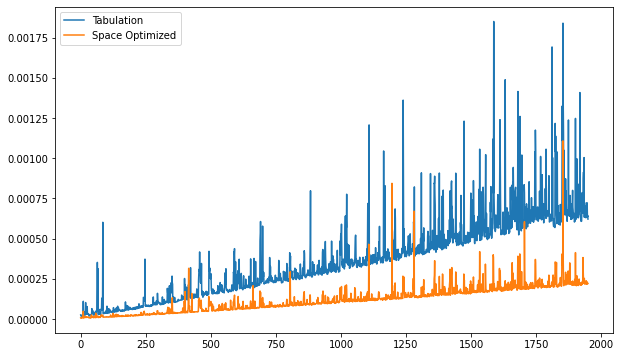

In [47]:
compare_execution_times2()

### Because the `space_optimized_fib` function's execution times grow slower than the `tabulation_fibonacci` function, we can conclude that the `space_optimized_fib` function is faster